<a href="https://colab.research.google.com/github/tech-dhawal-03/Data-Mining-Projects/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('/content/sample_data/customer.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         50000 non-null  int64  
 1   Name                50000 non-null  object 
 2   Surname             50000 non-null  object 
 3   Gender              44953 non-null  object 
 4   Birthdate           50000 non-null  object 
 5   Transaction Amount  50000 non-null  float64
 6   Date                50000 non-null  object 
 7   Merchant Name       50000 non-null  object 
 8   Category            50000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB
None


In [4]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,2023-04-03,Smith-Russell,Cosmetic
1,26381,Michelle,Phelps,NaN,1985-10-24,2552.72,2023-07-17,"Peck, Spence and Young",Travel
2,305449,Jacob,Williams,M,1981-10-25,115.97,2023-09-20,Steele Inc,Clothing
3,988259,Nathan,Snyder,M,1977-10-26,11.31,2023-01-11,"Wilson, Wilson and Russell",Cosmetic
4,764762,Crystal,Knapp,F,1951-11-02,62.21,2023-06-13,Palmer-Hinton,Electronics


In [17]:
# Pre Processing the data
print("DataFrame Columns:", df.columns)
# Checking for null values
df.isnull().sum()

DataFrame Columns: Index(['Name', 'Surname', 'Transaction Amount', 'Date', 'Merchant Name',
       'Category'],
      dtype='object')


,0
Name,0
Surname,0
Transaction Amount,0
Date,0
Merchant Name,0
Category,0


In [20]:
# Ensuring transaction amount numeric
df['Transaction Amount'] = pd.to_numeric(df['Transaction Amount'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6

In [22]:
# Handling Categorical Value - One Hot Encoding
df = pd.get_dummies(df, columns=['Category'], prefix=['Category'])

In [24]:
# Assigning numerical values to merchants
le = LabelEncoder()
df['Merchant Name Encoded'] = le.fit_transform(df['Merchant Name'])
df.head()

,Name,Surname,Transaction Amount,Date,Merchant Name,Month,DayOfWeek,Category_Clothing,Category_Cosmetic,Category_Electronics,Category_Market,Category_Restaurant,Category_Travel,Merchant Name Encoded
0,Sean,Rodriguez,35.47,2023-04-03,Smith-Russell,4,0,False,True,False,False,False,False,30959
1,Michelle,Phelps,2552.72,2023-07-17,"Peck, Spence and Young",7,0,False,False,False,False,False,True,25151
2,Jacob,Williams,115.97,2023-09-20,Steele Inc,9,2,True,False,False,False,False,False,31345
3,Nathan,Snyder,11.31,2023-01-11,"Wilson, Wilson and Russell",1,2,False,True,False,False,False,False,35990
4,Crystal,Knapp,62.21,2023-06-13,Palmer-Hinton,6,1,False,False,True,False,False,False,24639


In [26]:

numerical_features = ['Transaction Amount'] + [col for col in df.columns if 'Category_' in col or 'Merchant Name Encoded' in col]
df_scaled = df[numerical_features].copy()
scaler = StandardScaler()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])
print("\nScaled numerical features:\n", df_scaled.head())


Scaled numerical features:
    Transaction Amount  Category_Clothing  Category_Cosmetic  \
0           -0.643775          -0.444882           2.250723   
1            3.341338          -0.444882          -0.444302   
2           -0.516334           2.247785          -0.444302   
3           -0.682023          -0.444882           2.250723   
4           -0.601443          -0.444882          -0.444302   

   Category_Electronics  Category_Market  Category_Restaurant  \
0             -0.446913         -0.44878            -0.449776   
1             -0.446913         -0.44878            -0.449776   
2             -0.446913         -0.44878            -0.449776   
3             -0.446913         -0.44878            -0.449776   
4              2.237572         -0.44878            -0.449776   

   Category_Travel  Merchant Name Encoded  
0        -0.448619               1.158741  
1         2.229063               0.613467  
2        -0.448619               1.194980  
3        -0.448619       

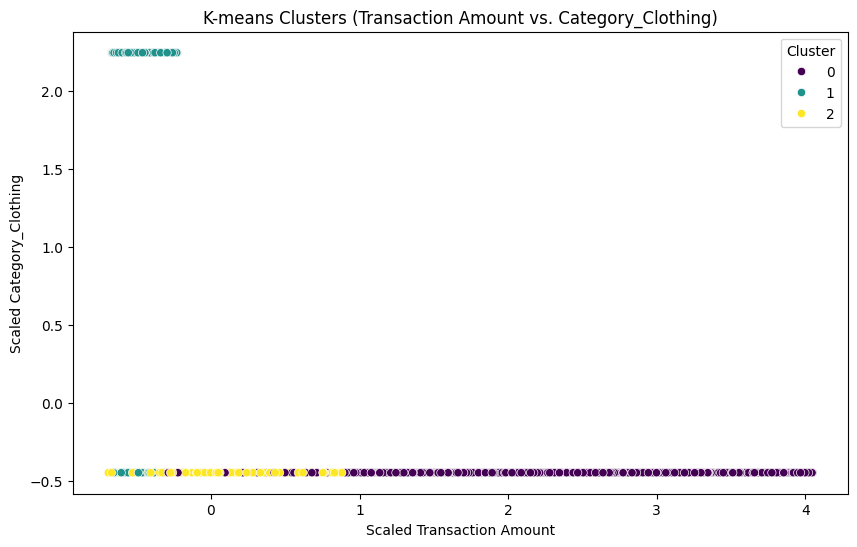


Cluster Characteristics (Mean of Scaled Features):
         Transaction Amount  Category_Clothing  Category_Cosmetic  \
Cluster                                                             
0                  1.738013          -0.444882          -0.444302   
1                 -0.530891           0.447846           0.447262   
2                 -0.079679          -0.444882          -0.444302   

         Category_Electronics  Category_Market  Category_Restaurant  \
Cluster                                                               
0                   -0.446913         -0.44878            -0.449776   
1                   -0.446913         -0.44878             0.452773   
2                    0.890669          0.89439            -0.449776   

         Category_Travel  Merchant Name Encoded  
Cluster                                          
0               2.229063               0.009456  
1              -0.448619               0.005497  
2              -0.448619              -0.01294

In [30]:
n_clusters = 3  # Let's start with 3 clusters
#  Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled[numerical_features])
if any(col.startswith('Category_') for col in df_scaled.columns):
    category_col = [col for col in df_scaled.columns if col.startswith('Category_')][0]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Transaction Amount', y=category_col, hue='Cluster', palette='viridis', data=df_scaled)
    plt.title(f'K-means Clusters (Transaction Amount vs. {category_col})')
    plt.xlabel('Scaled Transaction Amount')
    plt.ylabel(f'Scaled {category_col}')
    plt.show()
elif 'Merchant Name Encoded' in df_scaled.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Transaction Amount', y='Merchant Name Encoded', hue='Cluster', palette='viridis', data=df_scaled)
    plt.title('K-means Clusters (Transaction Amount vs. Merchant Name Encoded)')
    plt.xlabel('Scaled Transaction Amount')
    plt.ylabel('Scaled Merchant Name Encoded')
    plt.show()
else:
    # If only 'Transaction Amount' is available after scaling
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_scaled.index, y='Transaction Amount', hue='Cluster', palette='viridis', data=df_scaled)
    plt.title('K-means Clusters (Based on Scaled Transaction Amount)')
    plt.xlabel('Transaction Index')
    plt.ylabel('Scaled Transaction Amount')
    plt.show()

# Analyze the characteristics of each cluster (mean of scaled features)
print("\nCluster Characteristics (Mean of Scaled Features):")
print(df_scaled.groupby('Cluster')[numerical_features].mean())


Cluster Centroids (Mean of Scaled Features):
          Transaction Amount  Category_Clothing  Category_Cosmetic  \
Cluster                                                             
0                  1.738013          -0.444882          -0.444302   
1                 -0.530891           0.447846           0.447262   
2                 -0.079679          -0.444882          -0.444302   

         Category_Electronics  Category_Market  Category_Restaurant  \
Cluster                                                               
0                   -0.446913         -0.44878            -0.449776   
1                   -0.446913         -0.44878             0.452773   
2                    0.890669          0.89439            -0.449776   

         Category_Travel  Merchant Name Encoded  
Cluster                                          
0               2.229063               0.009456  
1              -0.448619               0.005497  
2              -0.448619              -0.012940  


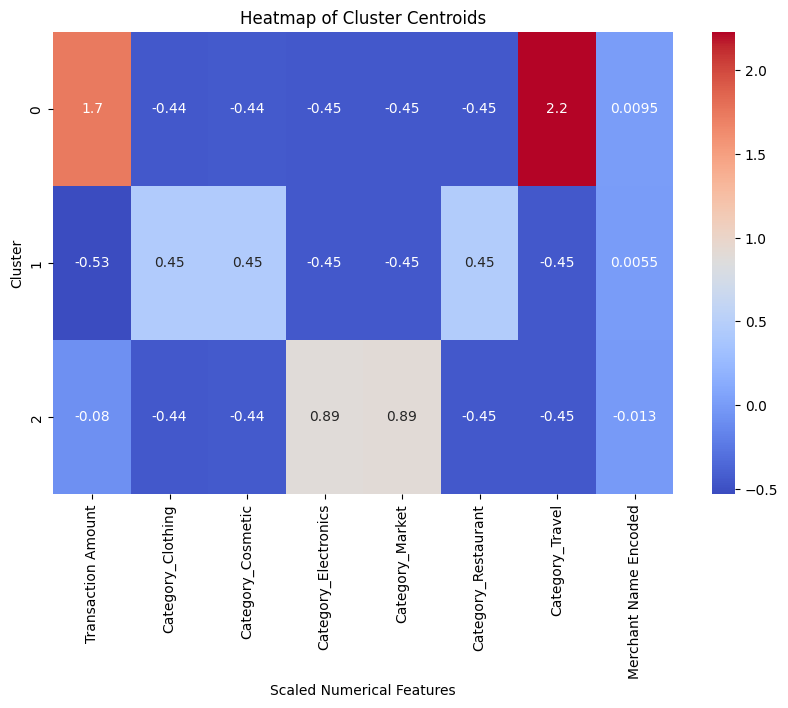

In [31]:
cluster_means = df_scaled.groupby('Cluster')[numerical_features].mean()
print("\nCluster Centroids (Mean of Scaled Features):\n", cluster_means)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Centroids')
plt.ylabel('Cluster')
plt.xlabel('Scaled Numerical Features')
plt.show()

In [32]:
# --- Potential Marketing Strategies (Illustrative) ---
cluster_characteristics = df_scaled.groupby('Cluster')[numerical_features].mean()
print("\nCluster Characteristics (Mean of Scaled Features for Strategy):")
print(cluster_characteristics)

print("\nPotential Marketing Strategies:")
for cluster in range(n_clusters):
    print(f"\n--- Cluster {cluster} ---")
    cluster_data = cluster_characteristics.loc[cluster]

    print("Characteristics (Scaled):")
    print(cluster_data)

    # Basic illustrative strategies based on scaled feature means
    if 'Transaction Amount' in cluster_data and cluster_data['Transaction Amount'] < 0:
        print("  Potential Strategy: Focus on discounts, promotions on lower-priced items, and loyalty programs to encourage more frequent purchases and potentially increase average order value.")
    elif 'Transaction Amount' in cluster_data and cluster_data['Transaction Amount'] > 0:
        print("  Potential Strategy: Explore upselling opportunities, introduce premium products or services, and offer exclusive deals to retain higher-spending customers.")
    else:
        print("  Potential Strategy: Maintain current engagement, analyze other features for more targeted approaches.")

    # Incorporate insights from Category (if one-hot encoded)
    for col in cluster_data.index:
        if col.startswith('Category_') and cluster_data[col] > 0.5: # Example threshold
            category = col.replace('Category_', '')
            print(f"  Potential Strategy: Offer targeted content, promotions, or new arrivals related to the '{category}' category.")

    # Incorporate insights from Merchant (Label Encoded - interpret cautiously)
    if 'Merchant Name Encoded' in cluster_data:
        if cluster_data['Merchant Name Encoded'] > cluster_characteristics['Merchant Name Encoded'].mean():
            print("  Potential Strategy: Analyze purchasing patterns related to merchants with higher encoded values in this cluster.")
        elif cluster_data['Merchant Name Encoded'] < cluster_characteristics['Merchant Name Encoded'].mean():
            print("  Potential Strategy: Analyze purchasing patterns related to merchants with lower encoded values in this cluster.")


Cluster Characteristics (Mean of Scaled Features for Strategy):
         Transaction Amount  Category_Clothing  Category_Cosmetic  \
Cluster                                                             
0                  1.738013          -0.444882          -0.444302   
1                 -0.530891           0.447846           0.447262   
2                 -0.079679          -0.444882          -0.444302   

         Category_Electronics  Category_Market  Category_Restaurant  \
Cluster                                                               
0                   -0.446913         -0.44878            -0.449776   
1                   -0.446913         -0.44878             0.452773   
2                    0.890669          0.89439            -0.449776   

         Category_Travel  Merchant Name Encoded  
Cluster                                          
0               2.229063               0.009456  
1              -0.448619               0.005497  
2              -0.448619         